In [1]:
import warnings
warnings.filterwarnings("ignore")

import cv2
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import itertools                 
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from termcolor import colored as cl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import jaccard_score as jss   
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA

# Loading Data

In [2]:
# import female data
image = os.listdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/female') # 讀取檔案資料
img_female = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/female') # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列 
    img_female += [irow]                                      # 將所有圖片一維陣列儲存在一個集合    
female = pd.DataFrame(img_female)                             # 輸出成資料框並命名
female['label'] = 0                                           # add label

# import male data
image = os.listdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/male') # 讀取檔案資料
img_male = []
for i in range(len(image)):
    os.chdir(r'C:/Users/x5134/Desktop/Datasets/ORL_Faces/male')   # 鎖定檔案
    img = cv2.imread(image[i], cv2.IMREAD_GRAYSCALE)          # 讀取圖檔
    irow = img.ravel()                                        # 轉為1維陣列
    img_male += [irow]                                        # 將所有圖片一維陣列儲存在一個集合
male = pd.DataFrame(img_male)                                 # 輸出成資料框並命名
male['label'] = 1                                             # add label

# concat two data
total = pd.concat([female,male], axis = 0, join = 'inner') # concat female and male data
total.index = range(0,400)                                 # rename index
total = (total.drop(['label'], axis = 1))                  # drop label, let shape become (400, 2576)

total_labels = pd.concat([female['label'], male['label']], axis = 0,join = 'inner') # concat label
total_labels.index = range(0,400)

In [3]:
# Splitting the dataset
total = StandardScaler().fit(total).transform(total)
X_train, X_test, y_train, y_test = train_test_split(total, total_labels, test_size = 0.2, random_state = 1)

# Q1
比較三個算法的結果可以發現 SVM > k-NN > LR。
LR 判斷 male 的能力較弱，而 SVM 跟 k-NN 判斷 Female 的效果較差。
SVM 的 loss function 自帶 regularization，因此比較不容易 overfitting，而 LR 容易 overfitting

# Logistic Regression

In [4]:
# Modeling (Logistic Regression)
lr = LogisticRegression(C = 0.1, solver = 'sag') # sag = Stochastic Average Gradient descent
lr.fit(X_train, y_train)

# Predictions
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [5]:
# Model Evalution
print(cl(classification_report(y_test, yhat), attrs = ['bold']))
print() # precision = TP/(TP+FP), Recall = TP/(TP+FN)
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Precision Score of our model is {}'.format(metrics.precision_score(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Log Loss of our model is {}'.format(metrics.log_loss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Test set Accuracy is {}'.format(metrics.accuracy_score(y_test, yhat).round(3)), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.37      1.00      0.54         7
           1       1.00      0.84      0.91        73

    accuracy                           0.85        80
   macro avg       0.68      0.92      0.72        80
weighted avg       0.94      0.85      0.88        80


Jaccard Similarity Score of our model is 0.836
Precision Score of our model is 1.0
Log Loss of our model is 5.181
Test set Accuracy is 0.85


In [6]:
# Confusion matrix
def plot_confusion_matrix(cm, classes,normalize = False, title = 'Confusion matrix', cmap = plt.cm.Blues):
    
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 15)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45, fontsize = 13)
    plt.yticks(tick_marks, classes, fontsize = 13)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 fontsize = 15,
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label', fontsize = 13)
    plt.xlabel('Predicted label', fontsize = 13)

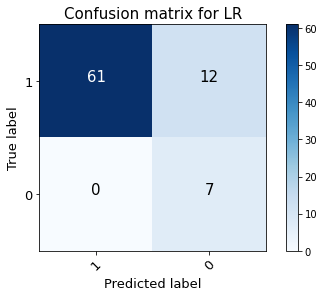

In [7]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix for LR')
# plt.savefig('confusion_matrix.png')

# k-NN

In [8]:
# Modeling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
yhat = knn.predict(X_test)

In [9]:
# Model Evalution
print(cl(classification_report(y_test, yhat), attrs = ['bold']))
print() # precision = TP/(TP+FP), Recall = TP/(TP+FN)
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Precision Score of our model is {}'.format(metrics.precision_score(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Log Loss of our model is {}'.format(metrics.log_loss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Test set Accuracy is {}'.format(metrics.accuracy_score(y_test, yhat).round(3)), attrs = ['bold']))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       0.97      1.00      0.99        73

    accuracy                           0.97        80
   macro avg       0.99      0.86      0.91        80
weighted avg       0.98      0.97      0.97        80


Jaccard Similarity Score of our model is 0.973
Precision Score of our model is 0.973
Log Loss of our model is 0.863
Test set Accuracy is 0.975


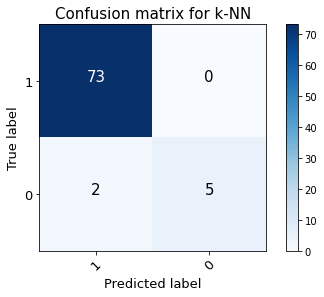

In [10]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix for k-NN')
# plt.savefig('confusion_matrix.png')

# Support Vector Machine

In [11]:
# Modeling
svm = SVC(kernel = 'linear', probability = True)
svm.fit(X_train, y_train)

# Predictions
yhat = svm.predict(X_test)

In [12]:
# Model Evalution
print(cl(classification_report(y_test, yhat), attrs = ['bold']))
print() # precision = TP/(TP+FP), Recall = TP/(TP+FN)
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Precision Score of our model is {}'.format(metrics.precision_score(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Log Loss of our model is {}'.format(metrics.log_loss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Test set Accuracy is {}'.format(metrics.accuracy_score(y_test, yhat).round(3)), attrs = ['bold']))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.99      1.00      0.99        73

    accuracy                           0.99        80
   macro avg       0.99      0.93      0.96        80
weighted avg       0.99      0.99      0.99        80


Jaccard Similarity Score of our model is 0.986
Precision Score of our model is 0.986
Log Loss of our model is 0.432
Test set Accuracy is 0.988


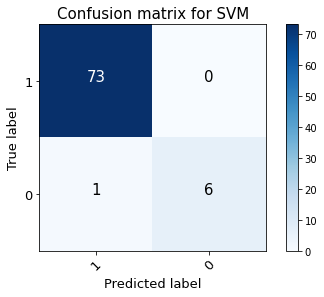

In [13]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix for SVM')
# plt.savefig('confusion_matrix.png')

# Q2

In [14]:
# Using PCA to reducing dimensionality and select 80% PC
pca = PCA(n_components = 17)
PC = pca.fit_transform(total)
X_train, X_test, y_train, y_test = train_test_split(PC, total_labels, test_size = 0.2, random_state = 1)

# LR

In [15]:
# Modeling (Logistic Regression)
lr = LogisticRegression(C = 0.1, solver = 'sag') # sag = Stochastic Average Gradient descent
lr.fit(X_train, y_train)

# Predictions
yhat = lr.predict(X_test)
yhat_prob = lr.predict_proba(X_test)

In [16]:
# Model Evalution
print(cl(classification_report(y_test, yhat), attrs = ['bold']))
print() # precision = TP/(TP+FP), Recall = TP/(TP+FN)
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Precision Score of our model is {}'.format(metrics.precision_score(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Log Loss of our model is {}'.format(metrics.log_loss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Test set Accuracy is {}'.format(metrics.accuracy_score(y_test, yhat).round(3)), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.97      0.99      0.98        73

    accuracy                           0.96        80
   macro avg       0.90      0.85      0.87        80
weighted avg       0.96      0.96      0.96        80


Jaccard Similarity Score of our model is 0.96
Precision Score of our model is 0.973
Log Loss of our model is 1.295
Test set Accuracy is 0.962


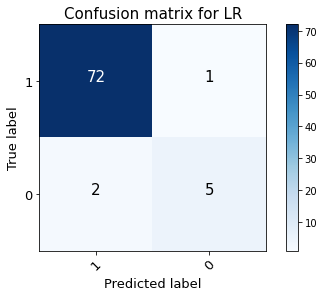

In [17]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix for LR')
# plt.savefig('confusion_matrix.png')

# k-NN

In [18]:
# Modeling
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predictions
yhat = knn.predict(X_test)

In [19]:
# Model Evalution
print(cl(classification_report(y_test, yhat), attrs = ['bold']))
print() # precision = TP/(TP+FP), Recall = TP/(TP+FN)
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Precision Score of our model is {}'.format(metrics.precision_score(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Log Loss of our model is {}'.format(metrics.log_loss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Test set Accuracy is {}'.format(metrics.accuracy_score(y_test, yhat).round(3)), attrs = ['bold']))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.96      1.00      0.98        73

    accuracy                           0.96        80
   macro avg       0.98      0.79      0.85        80
weighted avg       0.96      0.96      0.96        80


Jaccard Similarity Score of our model is 0.961
Precision Score of our model is 0.961
Log Loss of our model is 1.295
Test set Accuracy is 0.962


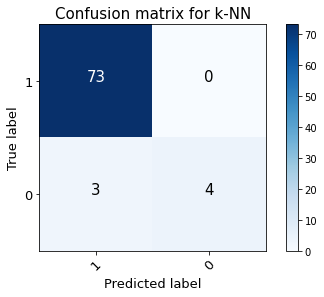

In [20]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix for k-NN')
# plt.savefig('confusion_matrix.png')

# SVM

In [21]:
# Modeling
svm = SVC(kernel = 'linear', probability = True)
svm.fit(X_train, y_train)

# Predictions
yhat = svm.predict(X_test)

In [22]:
# Model Evalution
print(cl(classification_report(y_test, yhat), attrs = ['bold']))
print() # precision = TP/(TP+FP), Recall = TP/(TP+FN)
print(cl('Jaccard Similarity Score of our model is {}'.format(jss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Precision Score of our model is {}'.format(metrics.precision_score(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Log Loss of our model is {}'.format(metrics.log_loss(y_test, yhat).round(3)), attrs = ['bold']))
print(cl('Test set Accuracy is {}'.format(metrics.accuracy_score(y_test, yhat).round(3)), attrs = ['bold']))

              precision    recall  f1-score   support

           0       0.83      0.71      0.77         7
           1       0.97      0.99      0.98        73

    accuracy                           0.96        80
   macro avg       0.90      0.85      0.87        80
weighted avg       0.96      0.96      0.96        80


Jaccard Similarity Score of our model is 0.96
Precision Score of our model is 0.973
Log Loss of our model is 1.295
Test set Accuracy is 0.962


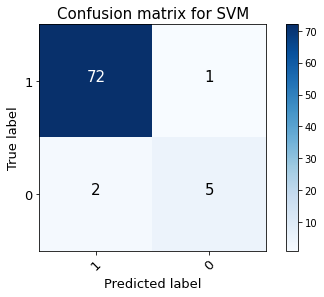

In [23]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels = [1,0])
np.set_printoptions(precision = 2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes = ['1','0'], normalize = False,  title = 'Confusion matrix for SVM')
# plt.savefig('confusion_matrix.png')